# Fully Connected Feed-Forward Network

In this notebook we will play with Feed-Forward FC-NN (Fully Connected Neural Network) for a *classification task*: 

Image Classification on MNIST Dataset

**RECALL**

In the FC-NN, the output of each layer is computed using the activations from the previous one, as follows:

$$h_{i} = \sigma(W_i h_{i-1} + b_i)$$

where ${h}_i$ is the activation vector from the $i$-th layer (or the input data for $i=0$), ${W}_i$ and ${b}_i$ are  the weight matrix and the bias vector for the $i$-th layer, respectively. 
<br><rb>
$\sigma(\cdot)$ is the activation function. In our example, we will use the *ReLU* activation function for the hidden layers and *softmax* for the last layer.

To regularize the model, we will also insert a Dropout layer between consecutive hidden layers. 

Dropout works by “dropping out” some unit activations in a given layer, that is setting them to zero with a given probability.

Our loss function will be the **categorical crossentropy**.

## Model definition
Keras supports two different kind of models: the [Sequential](http://keras.io/models/#sequential) model and the [Graph](http://keras.io/models/#graph) model. The former is used to build linear stacks of layer (so each layer has one input and one output), and the latter supports any kind of connection graph.

In our case we build a Sequential model with three [Dense](http://keras.io/layers/core/#dense) (aka fully connected) layers, with some [Dropout](http://keras.io/layers/core/#dropout). Notice that the output layer has the softmax activation function. 

The resulting model is actually a `function` of its own inputs implemented using the Keras backend. 

We apply the binary crossentropy loss and choose SGD as the optimizer. 

Please remind that Keras supports a variety of different [optimizers](http://keras.io/optimizers/) and [loss functions](http://keras.io/objectives/), which you may want to check out. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Introducing ReLU

The **ReLu** function is defined as $f(x) = \max(0, x),$ [1]

A smooth approximation to the rectifier is the *analytic function*: $f(x) = \ln(1 + e^x)$

which is called the **softplus** function.

The derivative of softplus is $f'(x) = e^x / (e^x + 1) = 1 / (1 + e^{-x})$, i.e. the **logistic function**.

[1] [http://www.cs.toronto.edu/~fritz/absps/reluICML.pdf]() by G. E. Hinton 

### Note: Keep in mind this function as it is heavily used in CNN

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

nb_classes = 10

# FC@512+relu -> FC@512+relu -> FC@nb_classes+softmax
# ... your Code Here

Using TensorFlow backend.


In [3]:
# %load ../solutions/sol_321.py

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

## Data preparation (`keras.dataset`)

We will train our model on the MNIST dataset, which consists of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

![](../imgs/mnist.png)

Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

We will:

* download the data
* reshape data to be in vectorial form (original data are images)
* normalize between 0 and 1.

The `binary_crossentropy` loss expects a **one-hot-vector** as input, therefore we apply the `to_categorical` function from `keras.utilis` to convert integer labels to **one-hot-vectors**.

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Split Training and Validation Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [9]:
X_train[0].shape

(784,)

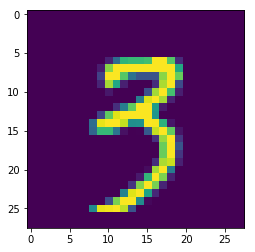

In [10]:
plt.imshow(X_train[0].reshape(28, 28))

In [11]:
print(np.asarray(range(10)))
print(Y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 1 0 0 0 0 0 0]


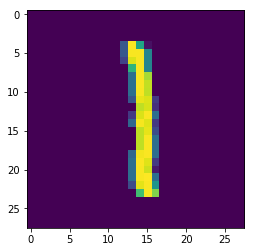

In [12]:
plt.imshow(X_val[0].reshape(28, 28))

In [13]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 1 0 0 0 0 0 0 0 0]


## Training
Having defined and compiled the model, it can be trained using the `fit` function. We also specify a validation dataset to monitor validation loss and accuracy.

In [14]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=2, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/2
45000/45000 [==============================] - 9s 208us/step - loss: 2.2318 - acc: 0.2139 - val_loss: 2.1027 - val_acc: 0.4302
Epoch 2/2
45000/45000 [==============================] - 10s 222us/step - loss: 1.9801 - acc: 0.5709 - val_loss: 1.8574 - val_acc: 0.6583


### Plotting Network Performance Trend
The return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and accuracy, for each epoch. We can therefore plot the behaviour of loss and accuracy during the training phase.

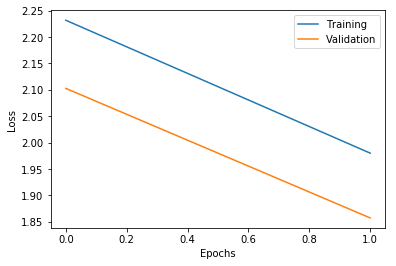

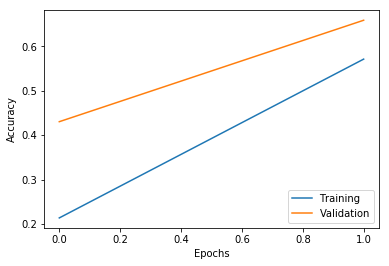

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

After `2` epochs, we get a `~88%` validation accuracy. 

* If you increase the number of epochs, you will get definitely better results.

### Quick Exercise: 

Try increasing the number of epochs (if you're hardware allows to)


In [16]:
# Your code here
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=2, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/2
45000/45000 [==============================] - 10s 211us/step - loss: 1.7307 - acc: 0.6979 - val_loss: 1.6058 - val_acc: 0.7329
Epoch 2/2
45000/45000 [==============================] - 9s 203us/step - loss: 1.4825 - acc: 0.7452 - val_loss: 1.3668 - val_acc: 0.7642


## Introducing the Dropout Layer

The **dropout layers** have the very specific function to *drop out* a random set of activations in that layers by setting them to zero in the forward pass. Simple as that. 

It allows to avoid *overfitting* but has to be used **only** at training time and **not** at test time. 

```python

keras.layers.core.Dropout(rate, noise_shape=None, seed=None)
```

Applies Dropout to the input.

Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Arguments

* rate: float between 0 and 1. Fraction of the input units to drop.
* noise_shape: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if your inputs have shape  (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features).
* seed: A Python integer to use as random seed.

**Note** Keras guarantess automatically that this layer is **not** used in **Inference** (i.e. Prediction) phase
(thus only used in **training** as it should be!)

See `keras.backend.in_train_phase` function

In [17]:
from keras.layers.core import Dropout

## Pls note **where** the `K.in_train_phase` is actually called!!
Dropout??

In [18]:
from keras import backend as K

K.in_train_phase?

### Exercise:

Try modifying the previous example network adding a Dropout layer:

In [19]:
from keras.layers.core import Dropout

# FC@512+relu -> DropOut(0.2) -> FC@512+relu -> DropOut(0.2) -> FC@nb_classes+softmax
# ... your Code Here

In [20]:
# %load ../solutions/sol_312.py

Train on 45000 samples, validate on 15000 samples
Epoch 1/4
45000/45000 [==============================] - 9s 205us/step - loss: 1.2600 - acc: 0.7742 - val_loss: 1.1640 - val_acc: 0.7930
Epoch 2/4
45000/45000 [==============================] - 9s 209us/step - loss: 1.0792 - acc: 0.7983 - val_loss: 1.0053 - val_acc: 0.8143
Epoch 3/4
45000/45000 [==============================] - 9s 211us/step - loss: 0.9404 - acc: 0.8174 - val_loss: 0.8852 - val_acc: 0.8259
Epoch 4/4
45000/45000 [==============================] - 10s 225us/step - loss: 0.8357 - acc: 0.8300 - val_loss: 0.7941 - val_acc: 0.8393


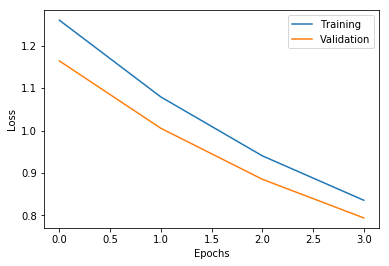

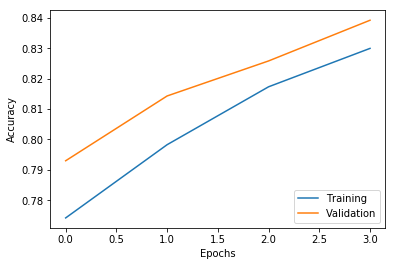

In [21]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=4, verbose=1, validation_data=(X_val, Y_val))
plot_history(network_history)

* If you continue training, at some point the validation loss will start to increase: that is when the model starts to **overfit**. 

It is always necessary to monitor training and validation loss during the training of any kind of Neural Network, either to detect overfitting or to evaluate the behaviour of the model **(any clue on how to do it??)**

In [22]:
# %load solutions/sol23.py
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])
    
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=100, 
          batch_size=128, verbose=True, callbacks=[early_stop]) 

Train on 45000 samples, validate on 10000 samples
Epoch 1/100
45000/45000 [==============================] - 10s 230us/step - loss: 1.4171 - acc: 0.6368 - val_loss: 0.6766 - val_acc: 0.8471
Epoch 2/100
45000/45000 [==============================] - 10s 231us/step - loss: 0.6255 - acc: 0.8288 - val_loss: 0.4334 - val_acc: 0.8859
Epoch 3/100
45000/45000 [==============================] - 10s 219us/step - loss: 0.4802 - acc: 0.8630 - val_loss: 0.3611 - val_acc: 0.8995
Epoch 4/100
45000/45000 [==============================] - 10s 220us/step - loss: 0.4175 - acc: 0.8785 - val_loss: 0.3224 - val_acc: 0.9106
Epoch 5/100
45000/45000 [==============================] - 10s 231us/step - loss: 0.3799 - acc: 0.8907 - val_loss: 0.2983 - val_acc: 0.9155
Epoch 6/100
45000/45000 [==============================] - 10s 233us/step - loss: 0.3537 - acc: 0.8960 - val_loss: 0.2811 - val_acc: 0.9193
Epoch 7/100
45000/45000 [==============================] - 11s 253us/step - loss: 0.3321 - acc: 0.9017 - val_l

Epoch 59/100
45000/45000 [==============================] - 13s 281us/step - loss: 0.0965 - acc: 0.9718 - val_loss: 0.0970 - val_acc: 0.9690
Epoch 60/100
45000/45000 [==============================] - 12s 269us/step - loss: 0.0960 - acc: 0.9718 - val_loss: 0.0961 - val_acc: 0.9699
Epoch 61/100
45000/45000 [==============================] - 15s 343us/step - loss: 0.0927 - acc: 0.9733 - val_loss: 0.0953 - val_acc: 0.9695
Epoch 62/100
45000/45000 [==============================] - 15s 327us/step - loss: 0.0916 - acc: 0.9730 - val_loss: 0.0944 - val_acc: 0.9693
Epoch 63/100
45000/45000 [==============================] - 12s 269us/step - loss: 0.0909 - acc: 0.9732 - val_loss: 0.0937 - val_acc: 0.9704
Epoch 64/100
45000/45000 [==============================] - 13s 283us/step - loss: 0.0906 - acc: 0.9729 - val_loss: 0.0930 - val_acc: 0.9707
Epoch 65/100
45000/45000 [==============================] - 17s 377us/step - loss: 0.0885 - acc: 0.9741 - val_loss: 0.0923 - val_acc: 0.9710
Epoch 66/100


---

# Inspecting Layers

In [23]:
# We already used `summary`
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### `model.layers` is iterable

In [24]:
print('Model Input Tensors: ', model.input, end='\n\n')
print('Layers - Network Configuration:', end='\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))
print('Model Output Tensors: ', model.output)

Model Input Tensors:  Tensor("dense_4_input:0", shape=(?, 784), dtype=float32)

Layers - Network Configuration:

dense_4 True
Layer Configuration:
{'name': 'dense_4', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
----------------------------------------
dropout_1 True
Layer Configuration:
{'name': 'dropout_1', 'trainable': True, 'rate': 0.2, 'noise_shape': None, 'seed': None}
----------------------------------------
dense_5 True
Layer Configuration:
{'name': 'dense_5', 'trainable': True, 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name

## Extract hidden layer representation of the given data

One **simple** way to do it is to use the weights of your model to build a new model that's truncated at the layer you want to read. 

Then you can run the `._predict(X_batch)` method to get the activations for a batch of inputs.

In [25]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(0.2))
model_truncated.add(Dense(512, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [26]:
# Check
np.all(model_truncated.layers[0].get_weights()[0] == model.layers[0].get_weights()[0])

True

In [27]:
hidden_features = model_truncated.predict(X_train)

In [28]:
hidden_features.shape

(45000, 512)

In [29]:
X_train.shape

(45000, 784)

#### Hint: Alternative Method to get activations 

(Using `keras.backend` `function` on Tensors)

```python
def get_activations(model, layer, X_batch):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((X_batch, False))
    return activations
```

---

### Generate the Embedding of Hidden Features

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:1000]) ## Reduced for computational issues

In [31]:
colors_map = np.argmax(Y_train, axis=1)

In [32]:
X_tsne.shape

(1000, 2)

In [33]:
nb_classes

10

In [34]:
np.where(colors_map==6)

(array([   37,    61,    71, ..., 44936, 44972, 44987]),)

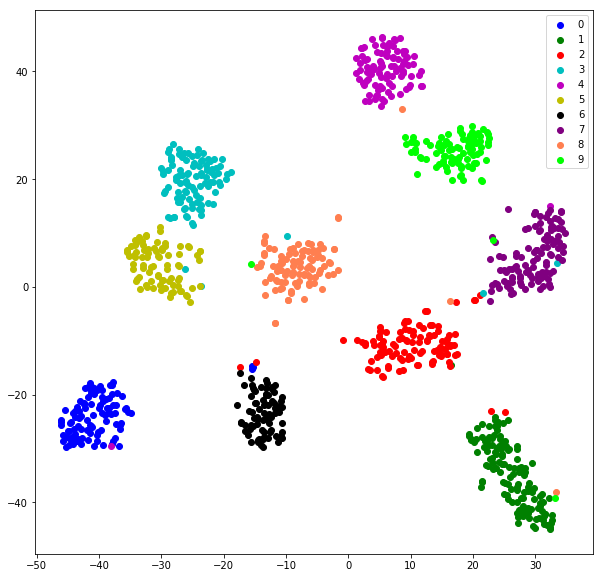

In [35]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

## Using Bokeh (Interactive Chart)

In [37]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

Loading BokehJS ...

In [38]:
p = figure(plot_width=600, plot_height=600)

colors = [x for x in 'blue-green-red-cyan-magenta-yellow-black-purple-coral-lime'.split('-')]
colors_map = colors_map[:1000]
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    p.circle(X_tsne[indices, 0].ravel(), X_tsne[indices, 1].ravel(), size=7, 
             color=colors[cl], alpha=0.4, legend=str(cl))

# show the results
p.legend.location = 'bottom_right'
show(p)

#### Note: We used `default` TSNE parameters. Better results can be achieved by tuning TSNE Hyper-parameters

## Exercise 1: 

### Try with a different algorithm to create the manifold

In [39]:
from sklearn.manifold import MDS

In [40]:
## Your code here

## Exercise 2: 

### Try extracting the Hidden features of the First and the Last layer of the model

In [41]:
## Your code here

In [42]:
## Try using the `get_activations` function relying on keras backend
def get_activations(model, layer, X_batch):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((X_batch, False))
    return activations

In [ ]:
testing complete; Gopal